In [202]:
# Import dependencies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [122]:
# Investigate the structure of each dataset
# Handle missing values, duplicates, and any inconsistencies
# Standardize column names if needed
# Ensure compatibility of data types

In [203]:
# Load datasets into pandas dataframes
csv_path = "Resources/abs_stats.csv"
gender_region_df = pd.read_csv(csv_path)

csv_path2 = "Resources/life_expectancy_data.csv"
life_expect_df = pd.read_csv(csv_path2)

csv_path3 = "Resources/health_expend_data.csv"
health_expend_df = pd.read_csv(csv_path3)

In [29]:
# Task (Aleksandra): Filter and analyze data related to gender and life expectancy
gender_region_df.dropna()
gender_region_df
# Perform analysis and visualize the relationship


,Region,Males - 16-18,Females 16-18,Persons - 16-18,Males - 17-19,Females - 17-19,Persons - 17-19,Males - 18-20,Females - 18-20,Persons - 18-20
0,NEW SOUTH WALES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Central Coast,79.2,83.8,81.4,79.2,83.6,81.4,79.1,84.3,81.7
2,Sydney - Baulkham Hills and Hawkesbury,84.6,87.5,86.0,84.6,87.7,86.1,85.0,88.1,86.5
3,Sydney - Blacktown,80.8,84.7,82.7,81.2,84.6,82.8,81.7,84.9,83.3
4,Sydney - City and Inner South,81.2,86.3,83.7,81.3,86.3,83.7,81.7,86.3,84.0
...,...,...,...,...,...,...,...,...,...,...
115,AUSTRALIAN CAPITAL TERRITORY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,Australian Capital Territory,81.2,85.3,83.2,81.6,85.6,83.5,82.1,85.9,84.0
117,Total Australian Capital Territory,81.2,85.3,83.2,81.6,85.6,83.5,82.1,85.9,84.0
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Research Question 1 - Health Expenditure

In [236]:
# Merge the two dataframes
merged_health_expend = pd.merge(life_expect_df, health_expend_df, left_on=["Country","Year"], right_on=["Country","Year"], how="left")
merged_health_expend

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Health Expenditure (GDP)
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,10.11
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,9.53
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,8.81
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,7.90
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,8.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,NaN
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,NaN
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,NaN
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,NaN


In [237]:
# Clean up data (drop na, 0 values), rename columns, keep variables/columns of interest to this research question
merged_health_expend = merged_health_expend.rename(columns={'Life expectancy ': 'Life expectancy'})
merged_health_expend = merged_health_expend[["Country", "Year", "Status", "Life expectancy", "Health Expenditure (GDP)", "Total expenditure"]]
merged_health_expend = merged_health_expend.dropna()
merged_health_expend = merged_health_expend.drop(merged_health_expend[merged_health_expend["Year"] == 2015].index)
merged_health_expend = merged_health_expend[(merged_health_expend != 0).all(1)]
merged_health_expend

,Country,Year,Status,Life expectancy,Health Expenditure (GDP),Total expenditure
1,Afghanistan,2014,Developing,59.9,9.53,8.18
2,Afghanistan,2013,Developing,59.9,8.81,8.13
3,Afghanistan,2012,Developing,59.5,7.90,8.52
4,Afghanistan,2011,Developing,59.2,8.56,7.87
5,Afghanistan,2010,Developing,58.8,8.57,9.20
...,...,...,...,...,...,...
2923,Zimbabwe,2014,Developing,59.2,8.13,6.44
2924,Zimbabwe,2013,Developing,58.0,7.11,6.88
2925,Zimbabwe,2012,Developing,56.6,6.92,6.69
2926,Zimbabwe,2011,Developing,54.9,8.08,6.31


In [217]:
# Group by developing/developed against mean values
avg_life_expect = merged_health_expend["Life expectancy"].groupby(merged_health_expend["Status"]).mean()
health_expend_gdp = merged_health_expend["Health Expenditure (GDP)"].groupby(merged_health_expend["Status"]).mean()
health_expend_gov = merged_health_expend["Total expenditure"].groupby(merged_health_expend["Status"]).mean()

# Create mean summary dataframe
avg_summary_df = pd.DataFrame({"Mean Life Expectancy": avg_life_expect,
                               "Mean Health Expenditure (% of GDP)": health_expend_gdp,
                               "Mean Health Expenditure (% of gov expend)": health_expend_gov})

avg_summary_df

,Mean Life Expectancy,Mean Health Expenditure (% of GDP),Mean Health Expenditure (% of gov expend)
Status,,,
Developed,79.033118,8.018022,7.567355
Developing,67.279346,5.336452,5.549664


In [245]:
# Group by year and status against mean values
year_status_grouped = merged_health_expend.groupby(["Year", "Status"])
life_expect_grouped = pd.DataFrame(year_status_grouped[["Life expectancy", "Health Expenditure (GDP)", "Total expenditure"]].mean())
life_expect_grouped = life_expect_grouped.rename(columns={"Life expectancy": "Mean Life Expectancy", "Health Expenditure (GDP)": "Mean Health Expenditure (% of GDP)", "Total expenditure": "Mean Health Expenditure (% of gov expend)"})
life_expect_grouped = life_expect_grouped.sort_values(by="Year", ascending=False)
life_expect_grouped

Mean Life Expectancy  Mean Health Expenditure (% of GDP)  \
Year Status                                                                 
2014 Developing             69.773050                            5.759362   
     Developed              81.119355                            8.599677   
2013 Developing             69.518440                            5.664681   
     Developed              80.658065                            8.543548   
2012 Developing             69.152817                            5.505634   
     Developed              80.422581                            8.568065   
2011 Developing             68.806294                            5.497832   
     Developed              80.693548                            8.531613   
2010 Developing             68.132394                            5.542394   
     Developed              79.893548                            8.551290   
2009 Developing             68.271631                            5.686170   
     Developed              79.377419                            8.612258   
2008 Developed              78.800000                            7.971935   
     Developing             67.775177                            5.305532   
2007 Developing             67.248936                            5.236879   
     Developed              79.212903                            7.703226   
2006 Developing             66.843972                            5.256738   
     Developed              79.109677                            7.779677   
2005 Developing             66.403546                            5.308511   
     Developed              78.564516                            7.858710   
2004 Developing             65.741844                            5.258156   
     Developed              78.358065                            7.820000   
2003 Developing             65.531206                            5.145248   
     Developed              77.916129                            7.785806   
2002 Developing             65.473381                            5.134676   
     Developed              77.519355                            7.549032   
2001 Developing             65.358696                            4.957609   
     Developed              77.090323                            7.293226   
2000 Developing             65.002899                            4.759203   
     Developed              76.761290                            7.102258   

                 Mean Health Expenditure (% of gov expend)  
Year Status                                                 
2014 Developing                                   5.838156  
     Developed                                    8.200645  
2013 Developing                                   5.830780  
     Developed                                    8.459355  
2012 Developing                                   5.895141  
     Developed                                    7.887097  
2011 Developing                                   5.697273  
     Developed                                    7.320000  
2010 Developing                                   5.650352  
     Developed                                    8.511613  
2009 Developing                                   6.104113  
     Developed                                    8.579355  
2008 Developed                                    7.055484  
     Developing                                   5.381844  
2007 Developing                                   5.210213  
     Developed                                    7.289677  
2006 Developing                                   5.278794  
     Developed                                    7.354194  
2005 Developing                                   5.534894  
     Developed                                    7.436452  
2004 Developing                                   5.460142  
     Developed                                    7.443548  
2003 Developing                                   5.497376  
     Developed             

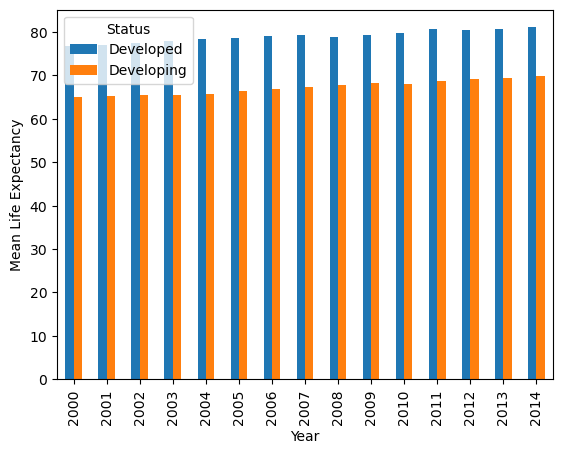

In [275]:
# Comparison view of mean life expectancy between Developed and Developing countries
merged_pivot = pd.pivot_table(merged_health_expend, 
                              values="Life expectancy",
                              index="Year",
                              columns="Status",
                              aggfunc="mean")
merged_pivot.plot.bar(ylabel="Mean Life Expectancy")
plt.show()

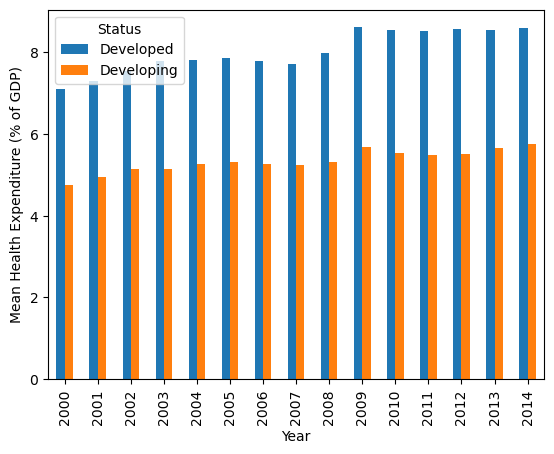

In [276]:
# Comparison view of health expenditure between Developing and Developed countries
merged_pivot = pd.pivot_table(merged_health_expend, 
                              values="Health Expenditure (GDP)",
                              index="Year",
                              columns="Status",
                              aggfunc="mean")
merged_pivot.plot.bar(ylabel="Mean Health Expenditure (% of GDP)")
plt.show()

### Analysis - Part 1
From the two graphs above, we can see that Developed countries on average have a higher life expectancy than Developing countries. Similarly for Health Expenditure, Developed countries significantly spend more on health than Developing countries. We can observe from the graphs that between 2009-2014, both Developing and Developed countries overall increased their spending on health compared to prior years of 2000-2008. Around 2010 onwards, there is a slight increase in the life expectancy for Developed countries, which does reflect the increase in health expenditure around the same time. For Developing countries, the life expectancy increases slightly in 2009 (which is also when health expenditure had a significant increase), before dropping slightly in 2010 and then increased from 2010 onwards. From above graphs, we can observe trends between Developed and Developing countries, however it does not give a representation of the relationship between Life Expectancy and Health Expenditure itself. 

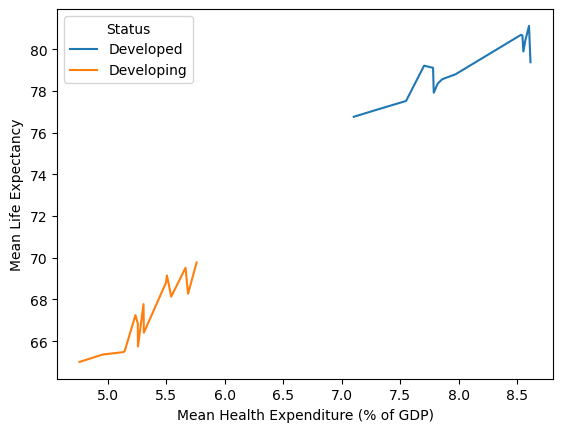

In [278]:
# Life expectancy vs. Health expenditure - developed vs. developing view 
merged_pivot = pd.pivot_table(life_expect_grouped, 
                              values="Mean Life Expectancy",
                              index="Mean Health Expenditure (% of GDP)",
                              columns="Status")
merged_pivot.plot(ylabel="Mean Life Expectancy")
plt.show()

The correlation between life expectancy and health expenditure (% of GDP) is 0.19.


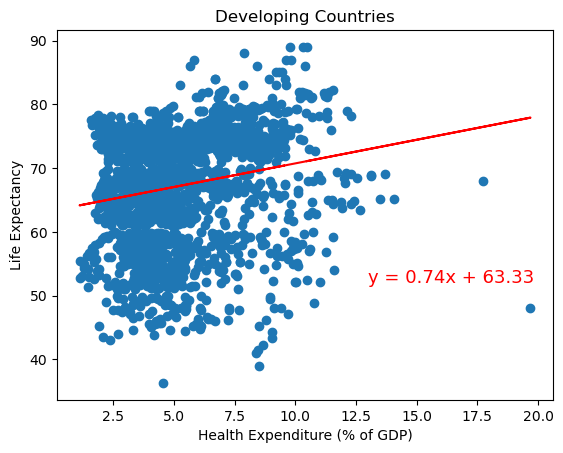

In [239]:
# Correlation between life expectancy and health expenditure for Developing countries
developing_df = merged_health_expend.loc[merged_health_expend["Status"] == "Developing"]
x_val = developing_df["Health Expenditure (GDP)"]
y_val = developing_df["Life expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between life expectancy and health expenditure (% of GDP) is " + str(round(rvalue, 2)) + ".")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"red")
plt.annotate(line_eq,(13,52),fontsize=13,color="red")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Developing Countries")
plt.show()

The correlation between life expectancy and health expenditure (% of GDP) is 0.37.


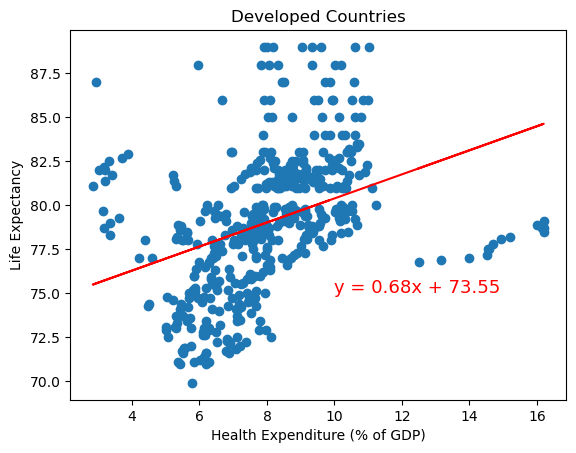

In [241]:
# Correlation between life expectancy and health expenditure for Developed countries
developed_df = merged_health_expend.loc[merged_health_expend["Status"] == "Developed"]
x_val = developed_df["Health Expenditure (GDP)"]
y_val = developed_df["Life expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between life expectancy and health expenditure (% of GDP) is " + str(round(rvalue, 2)) + ".")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"red")
plt.annotate(line_eq,(10,75),fontsize=13,color="red")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Developed Countries")
plt.show()

The correlation between life expectancy and health expenditure (% of GDP) is 0.36.


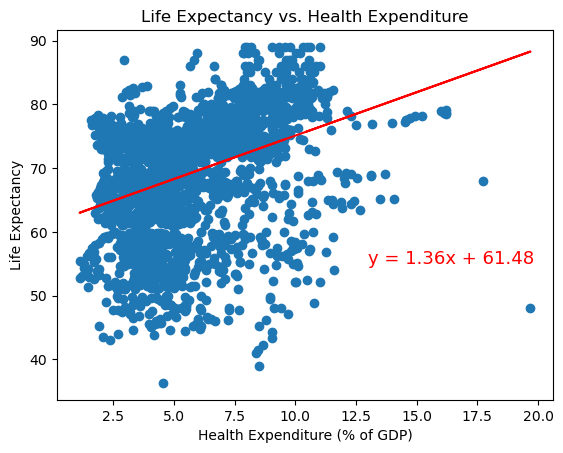

In [243]:
# Correlation between life expectancy and health expenditure across all countries
x_val = merged_health_expend["Health Expenditure (GDP)"]
y_val = merged_health_expend["Life expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The correlation between life expectancy and health expenditure (% of GDP) is " + str(round(rvalue, 2)) + ".")

plt.scatter(x_val,y_val)
plt.plot(x_val,regress_values,"red")
plt.annotate(line_eq,(13,55),fontsize=13,color="red")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.title("Life Expectancy vs. Health Expenditure")
plt.show()

### Analysis - Part 2
From above graphs, we can see that for Developing countries, there is a weak, positive relationship between health expenditure and life expectancy. For Developed countries, there is a medium-weak positive relationship between health expenditure and life expectancy. And overall across all countries, there is also a medium-weak positive relationship between health expnediture and life expectancy. Meaning across all graphs, as health expenditure increases, life expectancy slightly increases as well.

### Conclusion
From above observations and linear regression graphs, we can see that Health Expenditure has a slight impact on Life Expectancy. Although it is not a strong relationship, in conjunction with other factors, health expenditure has a positive impact on life expectancy.

In [ ]:
# Task (Shawn) Filter and analyze data related to residency location and life expectancy

# Perform analysis and visualize the relationship

In [ ]:
# Task (Cristian): Filter and analyze data related to income and life expectancy

# Perform analysis and visualize the relationship


In [ ]:
# Use Matplotlib, or any other preferred library for visualization
# Create relevant plots for each research question


In [ ]:
# Calculate median/average values for relevant columns

# Repeat for other relevant columns


In [ ]:
# Share insights based on visualizations and summary statistics
# Discuss preliminary findings with the team


In [ ]:
# Write a comprehensive report with key insights
# Discuss potential implications of the findings on life expectancy


In [ ]:
# Use Markdown cells for documentation in Jupyter Notebook
# Create visualizations and insights for the presentation
